In [17]:
%matplotlib inline
import thinkdsp

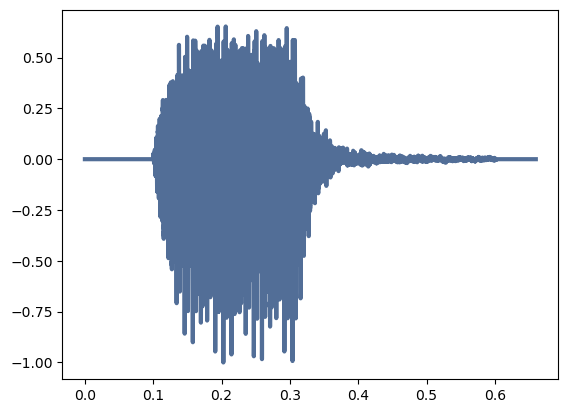

In [19]:
# import car horn
# car_horn = thinkdsp.read_wave('car.wav')
car_horn = thinkdsp.read_wave('car.wav')
# car_horn.make_audio()
car_horn.plot()
# car_horn.make_audio()

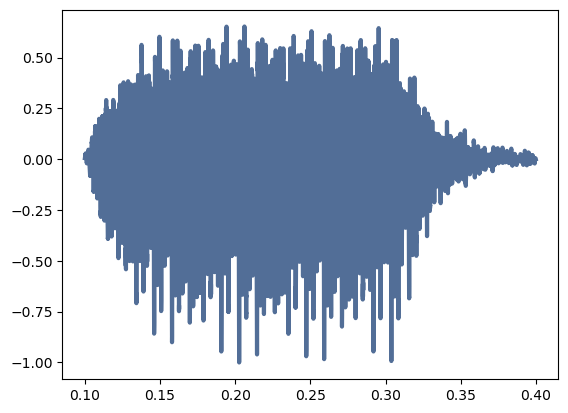

In [36]:
car_horn_segment = car_horn.segment(start=0.1, duration=0.3)
car_horn_segment.plot()



/Users/fohonyu/Desktop/soundSimulation/thinkplot.py:611: UserWarning: shading value 'autp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(X, Y, Z, **options)


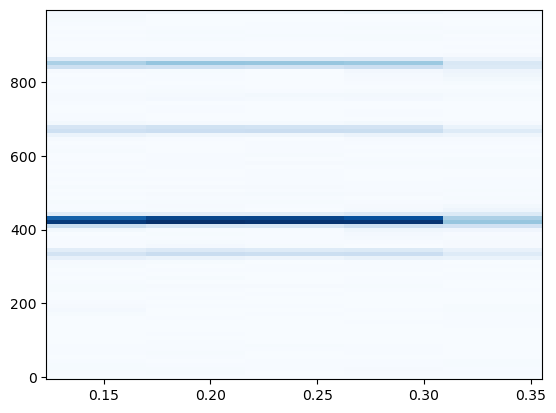

In [37]:
sp=car_horn_segment.make_spectrogram(seg_length=4096)
sp.plot(high=1000,shading='autp')

# Peprocess the signal by applying filters, resampling, or other signal processing techniques.

In [ ]:





\










